# Part 1. Fast multiplication

Let's install import the necessary libraries

In [1]:
import time
import timeit

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
import random

plt.rcParams['figure.figsize'] = [5, 5]

## 1.1 Number multiplication

### 1.1.1 Grade school multiplication algorithm

Here's a simple implementation of the grade school multiplication algorithm

In [2]:
def grade_school_multiplication(a, b):
    """Grade school multiplication algorithm"""
    result = 0
    while b > 0:
        if b & 1:
            result += a
        a <<= 1
        b >>= 1
    return result

### 1.1.2 Karatsuba multiplication algorithm


And here's the Karatsuba multiplication algorithm

In [3]:
def karatsuba_multiplication(a, b):
    """Karatsuba multiplication algorithm"""
    if a < 10 or b < 10:
        return a * b
    n = max(len(str(a)), len(str(b)))
    m = n // 2
    a1 = a // 10 ** m
    a2 = a % 10 ** m
    b1 = b // 10 ** m
    b2 = b % 10 ** m
    z0 = karatsuba_multiplication(a2, b2)
    z1 = karatsuba_multiplication(a1 + a2, b1 + b2)
    z2 = karatsuba_multiplication(a1, b1)
    return z2 * 10 ** (2 * m) + (z1 - z2 - z0) * 10 ** m + z0

Let's test our algorithms as well

In [4]:
print("Grade school multiplication: ", grade_school_multiplication(76, 967), "\n Built-in: ", 76 * 967)
print("Karatsuba multiplication: ", karatsuba_multiplication(38, 432), "\n Built-in: ", 38 * 432)

Grade school multiplication:  73492 
 Built-in:  73492
Karatsuba multiplication:  16416 
 Built-in:  16416


Now when we know algorithms is working fine, we can move on and derive theoretical time complexities for these one.

<br>

1. **Grade school multiplication**

    *Expected time complexity*: $O(n^2)$

    *Explanation*: To determine why this algorithm takes $O(n^2)$ time, let's divide it into 2 phases: multiplying and addition.
    1-st phase is multiplying: we want to multiply each digit of the second number by the first number. Each number takes $O(n)$ time to calculate, and there are $n$ such numbers, so we end up with $O(n^2)$ total time for this phase.
    2-nd phase is addition: here we go through at most $2n$ columns produced by the first phase adding each digit within particular column. This takes another $O(n^2)$ time.

    After all, we end up with $O(n^2) + O(n^2)$ time complexity, which asymptotically is just $O(n^2)$.

2. **Karatsuba multiplication**

    *Expected time complexity*: $O(n^{log_2 3})$

    *Explanation*: Karatsuba algorithm allows us to multiply two n-digit numbers by dividing the problem into three subproblems of size n/2, computing which takes $O(n)$ time.

    Taking this into account we can write down the time complexity equation as: $T(n) = 3 T(n/2) + O(n)$
    Since $n < n^{log_b a} = n^{log_2 3} $, we can apply the first case of the master theorem, which states that $T(n) = Θ(n^{log_2 3}) = O(n^{log_2 3})$

### 1.1.4 Actual time complexity

#### 1.1.4 a) Plot execution time depending on the number of digits


Here I will plot execution time depending on size of array. I will not use linear x space in order to improve running time. In order to check if actual execution times matches their predicted values, we will try to represent in as a straight line.

Math behind is pretty simple:
    - For Grade School Algorithm: $n = \sqrt{n^2}$
    - For Karatsuba Algorithm: $n = \sqrt[log_2 3]{n^{log_2 3}} = n^{log_2 3 * 1/log_2 3}$


Later I will use cubic interpolation to fill missing values and make the line smoother.

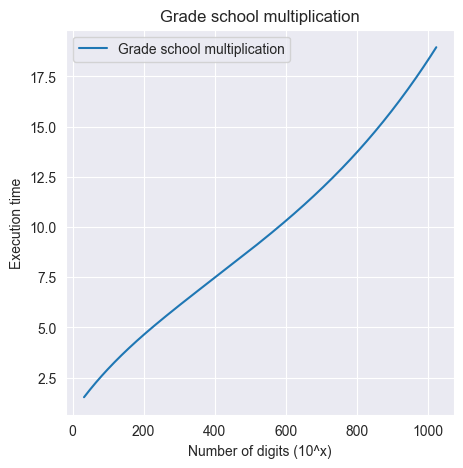

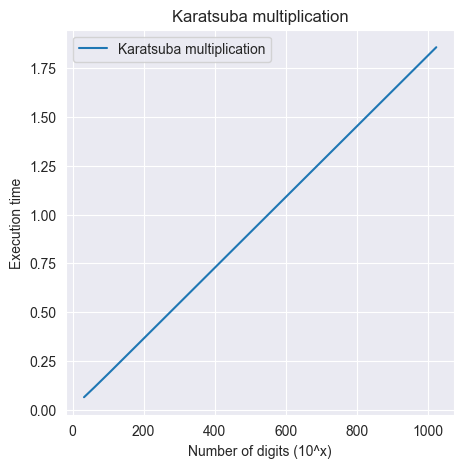

In [5]:
def plot_execution_time():
    """Plot execution time depending on the number of digits"""
    x = np.array([2 ** i for i in range(5, 11)])
    y1 = []
    y2 = []
    for i in x:
        a = 10 ** int(i) - 1
        b = 10 ** int(i) - 1


        grade_school_execution_time = timeit.timeit(lambda: grade_school_multiplication(a, b), number=100000)
        karatsuba_execution_time = timeit.timeit(lambda: karatsuba_multiplication(a, b), number=10)

        y1.append(grade_school_execution_time)
        y2.append(karatsuba_execution_time)

    x_new = np.linspace(x.min(), x.max(), 300)
    f1 = interp1d(x, np.sqrt(y1), kind='cubic')
    f2 = interp1d(x, np.power(y2, 1 / np.log2(3)), kind='cubic')

    plt.title("Grade school multiplication")
    plt.plot(x_new, f1(x_new), label='Grade school multiplication')
    plt.xlabel('Number of digits (10^x)')
    plt.ylabel('Execution time')
    plt.legend()
    plt.show()

    plt.title("Karatsuba multiplication")
    plt.plot(x_new, f2(x_new), label='Karatsuba multiplication')
    plt.xlabel('Number of digits (10^x)')
    plt.ylabel('Execution time')
    plt.legend()
    plt.show()


plot_execution_time()

As we can see here, the resulting curves are roughly straight lines. From here we can conclude that the execution time of these algorithms corresponds to the mathematically calculated ones.

#### 1.1.4 b) Plot execution time with actual math functions and rescaling y-axis


Here we're going to compare actual time complexities with the ones calculated mathematically. To do this, we will scale the predicted curves to real time dimensions

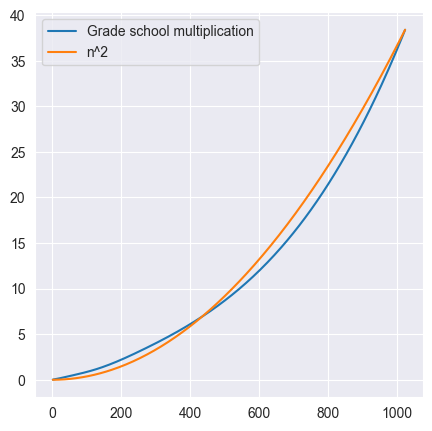

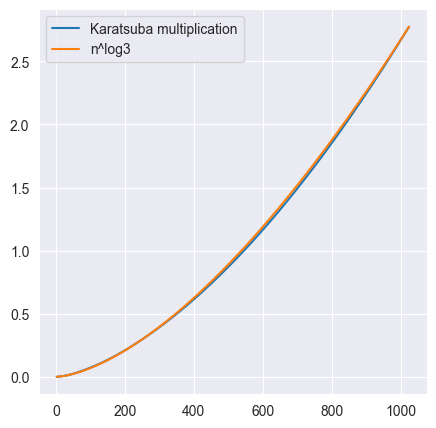

In [9]:
def plot_execution_time_with_scaling():
    """Plot execution time depending on the number of digits"""
    x = np.array([2 ** i for i in range(1, 11)])
    y1 = []
    y2 = []

    for i in x:
        a = 10 ** int(i) - 1
        b = 10 ** int(i) - 1

        grade_school_execution_time = timeit.timeit(lambda: grade_school_multiplication(a, b), number=10000)
        karatsuba_execution_time = timeit.timeit(lambda: karatsuba_multiplication(a, b), number=10)

        y1.append(grade_school_execution_time)
        y2.append(karatsuba_execution_time)

    x_new = np.linspace(x.min(), x.max(), 300)
    f1 = interp1d(x, y1, kind='cubic')
    f2 = interp1d(x, y2, kind='cubic')

    n_squared = np.array(x_new) ** 2
    n_log3 = np.array(x_new) ** np.log2(3)

    scaling_factor_n_squared = max(y1) / n_squared[-1]
    scaling_factor_n_log3 = max(y2) / n_log3[-1]

    plt.plot(x_new, f1(x_new), label='Grade school multiplication')
    plt.plot(x_new, n_squared * scaling_factor_n_squared, label='n^2')
    plt.legend()
    plt.show()

    plt.plot(x_new, f2(x_new), label='Karatsuba multiplication')
    plt.plot(x_new, n_log3 * scaling_factor_n_log3, label='n^log3')
    plt.legend()
    plt.show()


plot_execution_time_with_scaling()

#### 1.1.5 Check if execution time depends on actual values of numbers


In [18]:
min_num = 100000000000000
max_num = 999999999999999
random_number = random.randint(10 ** 14, 10 ** 15 - 1)

microseconds_multiplier = 1000000

print('Grade school multiplication')
for number in [min_num, max_num, random_number]:
    total_time = 0
    for _ in range(1000):
        start_time = time.time()
        grade_school_multiplication(number, number)
        total_time += time.time() - start_time

    print(f'Average execution time for number {number}: {total_time * microseconds_multiplier / 1000} microseconds')


print('Karatsuba multiplication')
for number in [min_num, max_num, random_number]:
    total_time = 0
    for _ in range(100):
        start_time = time.time()
        karatsuba_multiplication(number, number)
        total_time += time.time() - start_time

    print(f'Average execution for number {number}: {total_time * microseconds_multiplier / 1000} microseconds')

Grade school multiplication
Average execution time for number 100000000000000: 7.322072982788086 microseconds
Average execution time for number 999999999999999: 9.15837287902832 microseconds
Average execution time for number 524102802632081: 8.548498153686523 microseconds
Karatsuba multiplication
Average execution for number 100000000000000: 5.534172058105469 microseconds
Average execution for number 999999999999999: 27.029752731323242 microseconds
Average execution for number 524102802632081: 13.679265975952148 microseconds


From the results, we can make the following conclusions:
1. The execution time of grade school multiplication algorithm is independent of the actual values of the numbers.
2. The execution time of Karatsuba multiplication algorithm is dependent from the actual values of the numbers.

## 1.2 Matrix multiplication
### 1.2.1 Trivial matrix multiplication algorithm


In [11]:
def trivial_matrix_multiplication(matrix1, matrix2):
    """Trivial matrix multiplication algorithm"""
    if matrix1.shape[1] != matrix2.shape[0]:
        raise ValueError('Matrix dimensions are not compatible')

    result = np.matrix(np.zeros((matrix1.shape[0], matrix2.shape[1])), dtype=int)

    for i in range(matrix1.shape[0]):
        for j in range(matrix2.shape[1]):
            for k in range(matrix1.shape[1]):
                result[i, j] += matrix1[i, k] * matrix2[k, j]

    return np.matrix(result, dtype=int)

### 1.2.2 Strassen matrix multiplication algorithm


In [12]:
def strassen_matrix_multiplication(matrix1, matrix2):
    """Strassen matrix multiplication algorithm"""
    if matrix1.shape[1] != matrix2.shape[0]:
        raise ValueError('Matrix dimensions are not compatible')

    if matrix1.shape[0] == 1:
        return matrix1 * matrix2

    if matrix1.size < 64:
        return trivial_matrix_multiplication(matrix1, matrix2)

    a11 = matrix1[:matrix1.shape[0] // 2, :matrix1.shape[1] // 2]
    a12 = matrix1[:matrix1.shape[0] // 2, matrix1.shape[1] // 2:]
    a21 = matrix1[matrix1.shape[0] // 2:, :matrix1.shape[1] // 2]
    a22 = matrix1[matrix1.shape[0] // 2:, matrix1.shape[1] // 2:]

    b11 = matrix2[:matrix2.shape[0] // 2, :matrix2.shape[1] // 2]
    b12 = matrix2[:matrix2.shape[0] // 2, matrix2.shape[1] // 2:]
    b21 = matrix2[matrix2.shape[0] // 2:, :matrix2.shape[1] // 2]
    b22 = matrix2[matrix2.shape[0] // 2:, matrix2.shape[1] // 2:]

    p1 = strassen_matrix_multiplication(a11, b12 - b22)
    p2 = strassen_matrix_multiplication(a11 + a12, b22)
    p3 = strassen_matrix_multiplication(a21 + a22, b11)
    p4 = strassen_matrix_multiplication(a22, b21 - b11)
    p5 = strassen_matrix_multiplication(a11 + a22, b11 + b22)
    p6 = strassen_matrix_multiplication(a12 - a22, b21 + b22)
    p7 = strassen_matrix_multiplication(a11 - a21, b11 + b12)

    c11 = p5 + p4 - p2 + p6
    c12 = p1 + p2
    c21 = p3 + p4
    c22 = p1 + p5 - p3 - p7

    result = np.bmat([[c11, c12], [c21, c22]])

    return result

In [21]:
print('Trivial matrix multiplication')
print(trivial_matrix_multiplication(np.matrix([[1, 2], [3, 4]]), np.matrix([[5, 6], [7, 8]])))

print('Strassen matrix multiplication')
print(strassen_matrix_multiplication(np.matrix([[1, 2], [3, 4]]), np.matrix([[5, 6], [7, 8]])))

Trivial matrix multiplication
[[19 22]
 [43 50]]
Strassen matrix multiplication
[[19 22]
 [43 50]]


### 1.2.3 Derive theoretical time complexities

1. **Trivial algorithm**

*Expected complexity*: $O(n^3)$

*Explanation*: For each of $n$ rows in a matrix we want to multiply each number of that row by a corresponding numbers in other matrix $m$ columns. If we multiply two $n$ x $m$ ($n > m$) matrices, then every element of the output matrix is the result of a dot product. Each dot product takes $O(n)$ time, and we need to do $n*m$ of them, that takes $O(n^2)$. Thus, the entire matrix multiplication takes $O(n^3)$ time.

2. **Strassen multiplication**

*Expected complexity*: $O(n^{log_2 7})$

*Explanation*: The main idea of this algorithm is to divide the input matrices into 8 submatrices and then recursively calculate them. Obviously, we need recursive calls to archive the desired result, however Strassen algorithm allows us to compute it in 7 calls. When we know the theory, let's write down the time complexity equation: $T(n) = 7T(n/2) + O(n^2)$
Since $n^2 < n^{log_b a} = n^{log_2 7}$, we can apply the first case of the master theorem, which states that $T(n) = Θ(n^{log_2 7}) = O(n^{log_2 7})$


### 1.2.4 Obtain execution time in experiments
#### 1.2.4 a) Plot execution time dependency on number length n


Now let's plot the dependency of execution time on matrix size for trivial algorithm and Strassen multiplication. To speed up the process and make curves smoother I'll again use some interpolation

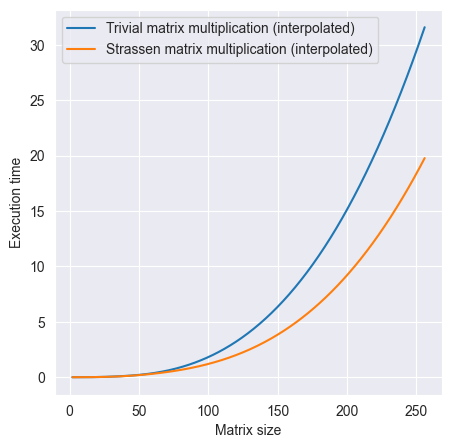

In [22]:
def plot_matrix_multiplication_execution_time():
    """Plot execution time dependency on number length n.
    Note that for Strassen algorithm, the size of the matrix must be a power of 2.
    """
    from scipy.interpolate import interp1d
    x = np.array([2 ** i for i in range(1, 9)])
    y1 = []
    y2 = []

    for i in x:
        matrix1 = np.matrix(np.random.randint(0, 10, (i, i)))
        matrix2 = np.matrix(np.random.randint(0, 10, (i, i)))

        start_time = time.time()
        trivial_matrix_multiplication(matrix1, matrix2)
        y1.append(time.time() - start_time)

        start_time = time.time()
        strassen_matrix_multiplication(matrix1, matrix2)
        y2.append(time.time() - start_time)

    # noinspection PyArgumentList
    x_new = np.linspace(x.min(), x.max(), 300)
    f1 = interp1d(x, y1, kind='cubic')
    f2 = interp1d(x, y2, kind='cubic')
    plt.plot(x_new, f1(x_new), label='Trivial matrix multiplication (interpolated)')
    plt.plot(x_new, f2(x_new), label='Strassen matrix multiplication (interpolated)')

    plt.xlabel('Matrix size')
    plt.ylabel('Execution time')
    plt.legend()
    plt.show()


plot_matrix_multiplication_execution_time()


When plotted together, the execution time curves clearly show us that Strassen multiplication is actually faster on relatively large sizes.

#### 1.2.4 b) Rescale y-axis to check if execution time measurements match theoretical complexity


Here we're going to compare actual time complexities with the ones calculated mathematically just as we did with the multiplication of numbers. To do this, we will scale the predicted curves to real time dimensions

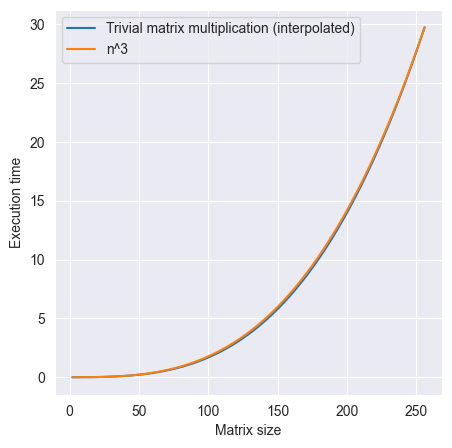

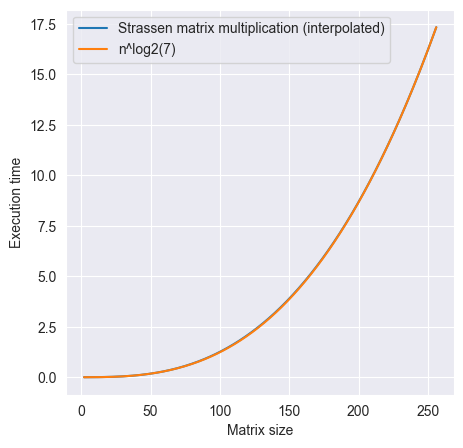

In [23]:
def plot_matrix_multiplication_execution_time_with_scale():
    """Plot execution time dependency on number length n.
    Note that for Strassen algorithm, the size of the matrix must be a power of 2.
    """
    x = np.array([2 ** i for i in range(1, 9)])
    y1 = []
    y2 = []

    for i in x:
        matrix1 = np.matrix(np.random.randint(0, 10, (i, i)))
        matrix2 = np.matrix(np.random.randint(0, 10, (i, i)))

        trivial_execution_time = timeit.timeit(lambda: trivial_matrix_multiplication(matrix1, matrix2), number=1)
        strassen_execution_time = timeit.timeit(lambda: strassen_matrix_multiplication(matrix1, matrix2), number=1)

        y1.append(trivial_execution_time)
        y2.append(strassen_execution_time)

    # noinspection PyArgumentList
    x_new = np.linspace(x.min(), x.max(), 300)
    f1 = interp1d(x, y1, kind='cubic')
    f2 = interp1d(x, y2, kind='cubic')

    y1_new = f1(x_new)
    y2_new = f2(x_new)

    n_cube = x_new ** 3
    n_log_2_7 = x_new ** np.log2(7)

    scaling_factor_n_cube = y1_new[-1] / n_cube[-1]
    scaling_factor_n_log_2_7 = y2_new[-1] / n_log_2_7[-1]

    plt.plot(x_new, f1(x_new), label='Trivial matrix multiplication (interpolated)')
    plt.plot(x_new, n_cube * scaling_factor_n_cube, label='n^3')
    plt.xlabel('Matrix size')
    plt.ylabel('Execution time')
    plt.legend()
    plt.show()

    plt.plot(x_new, f2(x_new), label='Strassen matrix multiplication (interpolated)')
    plt.plot(x_new, n_log_2_7 * scaling_factor_n_log_2_7, label='n^log2(7)')
    plt.xlabel('Matrix size')
    plt.ylabel('Execution time')
    plt.legend()
    plt.show()

plot_matrix_multiplication_execution_time_with_scale()


As we can see, these algorithms work a little longer, but at the same time are more stable than the number multiplication algorithms, so we can observe a perfect matching of the curves on the graphs.

### 1.2.5 Check if execution time depends on values inside matrices

Now let's check if execution time somehow changes for different matrices. We will run tests on matrices filled with 1's, 9's and random digits, sampling 10 times for each matrix type.

In [19]:
def timeit(func, *args, **kwargs):
    import timeit
    return timeit.timeit(lambda: func(*args, **kwargs), number=10)


ones_matrix = np.matrix(np.full((64, 64), 1))
nine_matrix = np.matrix(np.full((64, 64), 9))
random_matrix = np.matrix(np.random.randint(0, 10, (64, 64)))

trivial_execution_time_zeros = timeit(trivial_matrix_multiplication, ones_matrix, ones_matrix)
trivial_execution_time_nines = timeit(trivial_matrix_multiplication, nine_matrix, nine_matrix)
trivial_execution_time_random = timeit(trivial_matrix_multiplication, random_matrix, random_matrix)

strassen_execution_time_zeros = timeit(strassen_matrix_multiplication, ones_matrix, ones_matrix)
strassen_execution_time_nines = timeit(strassen_matrix_multiplication, nine_matrix, nine_matrix)
strassen_execution_time_random = timeit(strassen_matrix_multiplication, random_matrix, random_matrix)

print(f"Trivial matrix multiplication execution time for ones matrix: {trivial_execution_time_zeros}")
print(f"Trivial matrix multiplication execution time for nines matrix: {trivial_execution_time_nines}")
print(f"Trivial matrix multiplication execution time for random matrix: {trivial_execution_time_random}")

print(f"Strassen matrix multiplication execution time for ones matrix: {strassen_execution_time_zeros}")
print(f"Strassen matrix multiplication execution time for nines matrix: {strassen_execution_time_nines}")
print(f"Strassen matrix multiplication execution time for random matrix: {strassen_execution_time_random}")

Trivial matrix multiplication execution time for ones matrix: 5.785042978999627
Trivial matrix multiplication execution time for nines matrix: 5.763150986000255
Trivial matrix multiplication execution time for random matrix: 5.670191624998552
Strassen matrix multiplication execution time for ones matrix: 4.6052592050000385
Strassen matrix multiplication execution time for nines matrix: 4.603083570998933
Strassen matrix multiplication execution time for random matrix: 4.614657971998895


From the data collected here we can conclude that execution time of matrix multiplication algorithms doesn't depend on actual values inside matrices. We may see minor deviations and fluctuations, but this is due at most to side processes and the inaccuracy of this method of measuring execution time.

**In general, it is worth emphasizing that all the experiments in this practical are not perfect, since such an analysis requires a slightly different profiling to obtain accurate results of the time the algorithms work on the processor**